In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('/home/karen/Documents/Datasets/Toxic_Comment_Classification/train.csv')
test_df = pd.read_csv('/home/karen/Documents/Datasets/Toxic_Comment_Classification/test.csv')
test_labels_df = pd.read_csv('/home/karen/Documents/Datasets/Toxic_Comment_Classification/test_labels.csv')
submission_df = pd.read_csv('/home/karen/Documents/Datasets/Toxic_Comment_Classification/sample_submission.csv')

In [4]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [9]:
pd.options.display.max_colwidth = 150

In [12]:
train_df[train_df['threats'] == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
79,003217c3eb469ba9,Hi! I am back again!\nLast warning!\nStop undoing my edits or die!,1,0,0,1,0,0
176,006b94add72ed61c,I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms,1,0,1,1,1,1
600,0199d6af27b715f3,"I'm also a sock puppet of this account...SUPRISE!!\n-sincerely,\n The man that will track you down from the Internet and kill you",1,0,0,1,0,0
802,02230885017a50c5,"Fuck you, Smith. Please have me notified when you die. I want to dance on your grave.",1,0,1,1,1,0
1017,02c6e41e4b317ac3,"WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'LL FIND OUT WHERE YOU LIVE, SODOMIZE YOUR WIFE AND THEN BURN YOUR HOUSE DOWN. FUCK YOU YOU FUCKING QU...",1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
157718,e26b106943e02cbf,"bitch \nyou are a fucking hore. you suck dick you big ass hole. you are gay you faggot ass bitch. you can go to hell you bitch ass motherfucker, s...",1,0,1,1,1,1
158717,f264b7fb9a4b4f53,stupid head \n\nYOur dumb and you are stupid die die die go suck a butt,1,0,1,1,1,0
158856,f4dca9e513e0366f,"Hey \n\nhey faggot, are you dead yet? or are you watching your mom getting raped by filthy pigs? which one is it? I'm coming to rape your mom and ...",1,1,1,1,1,0
159029,f780e4f42aa5a344,Death to Musulmans!,1,0,0,1,0,1


In [10]:
train_df[train_df['toxic'] == 1].comment_text[:5]

6                                                                                                              COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
12    Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG...
16                                                                                              Bye! \n\nDon't look, come or think of comming back! Tosser.
42    You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, ...
43                                                                                                                 FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
Name: comment_text, dtype: object

In [13]:
train_df[train_df['toxic'] == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,"Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG...",1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming back! Tosser.",1,0,0,0,0,0
42,001810bf8c45bf5f,"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, ...",1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fucking shit eating liberal, you make lady bird johnson shake on her tampon. I said fucking sorry for my l...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on great white shark was total vandalism and was very sexual. All you edit here is fucking bullshit like s...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my edits ever again I'm annoyed because the WWE 2K15 a few of the roster have been confirmed and your st...",1,0,0,0,1,0


In [14]:
train_df[train_df['identity_hate'] == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
42,001810bf8c45bf5f,"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, ...",1,0,1,0,1,1
105,00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1
176,006b94add72ed61c,I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms,1,0,1,1,1,1
218,008e0818dde894fb,"Kill all niggers. \n\nI have hard, that others have said this.. should this be included? That racists sometimes say these.",1,0,1,0,1,1
238,0097dd5c29bf7a15,u r a tw@ fuck off u gay boy.U r smelly.Fuck ur mum poopie,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...
159281,fb726deec64157bd,LoL!! \n\nyou're GAY!! you will never know how good it feels to fuck a woman up the ass!!,1,1,1,0,1,1
159336,fc3efa2f6f025f6d,"Oh, fuck off. The pansy Jew would just whine about it to the B'nai Brith and beat a Palestinian child over it.",1,0,1,0,1,1
159400,fd052883fa6a8697,"Shalom \n\nSemite, get the fuck out of here. I will kill you, you son of a bitch if you don't leave wikipedia. If you tell anyone I said this to y...",1,1,1,1,1,1
159449,fdce660ddcd6d7ca,I think he is a gay fag!!!,1,0,0,0,0,1


In [15]:
train_df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [16]:
train_df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [17]:
train_df['identity_hate'].value_counts()

0    158166
1      1405
Name: identity_hate, dtype: int64

In [18]:
train_df['insult'].value_counts()

0    151694
1      7877
Name: insult, dtype: int64

In [19]:
train_df['obscene'].value_counts()

0    151122
1      8449
Name: obscene, dtype: int64

In [20]:
train_df['severe_toxic'].value_counts()

0    157976
1      1595
Name: severe_toxic, dtype: int64

In [29]:
categories = list(train_df.columns.values)
categories = categories[2:]
categories

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [30]:
counts = []
for category in categories:
    counts.append((category, train_df[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


<Axes: title={'center': 'Comments in each category'}, xlabel='category', ylabel='number of comments'>

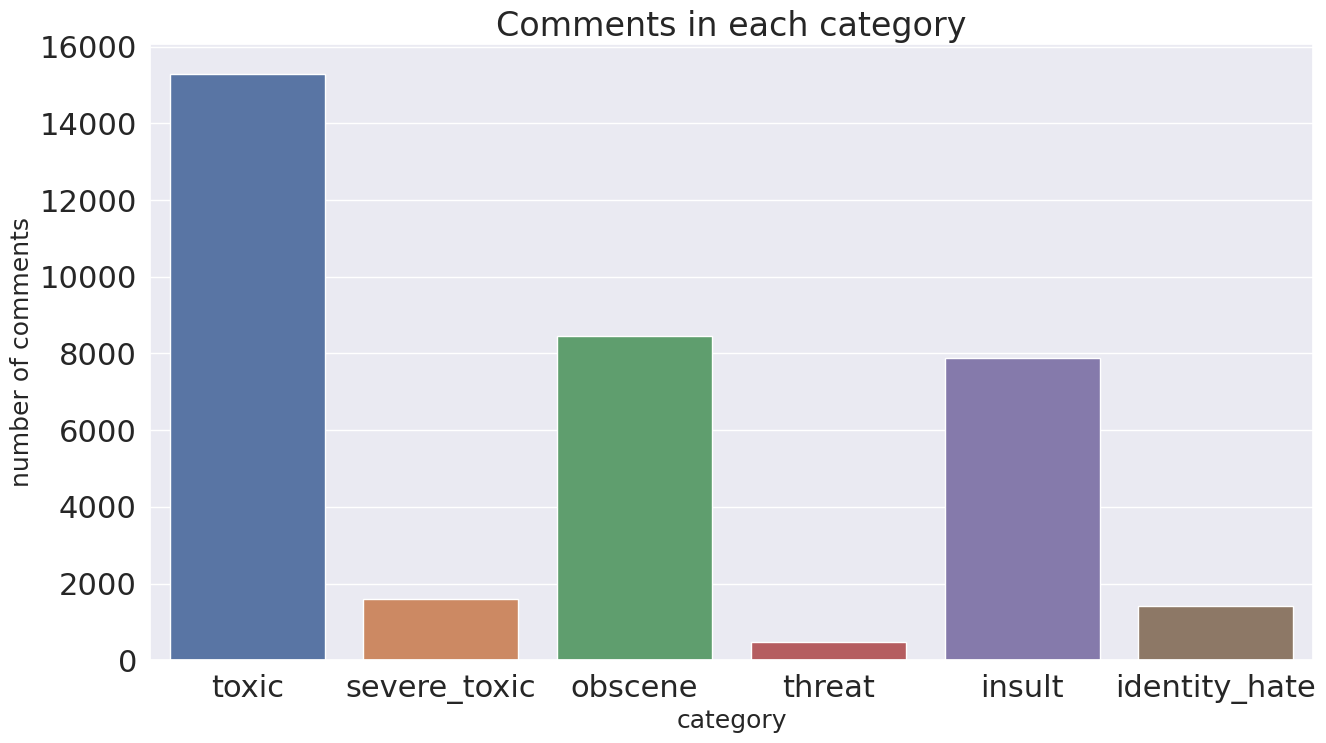

In [35]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)


sns.barplot(data=df_stats, x='category', y='number of comments')

### WordCloud representation of most used words in each category of comments

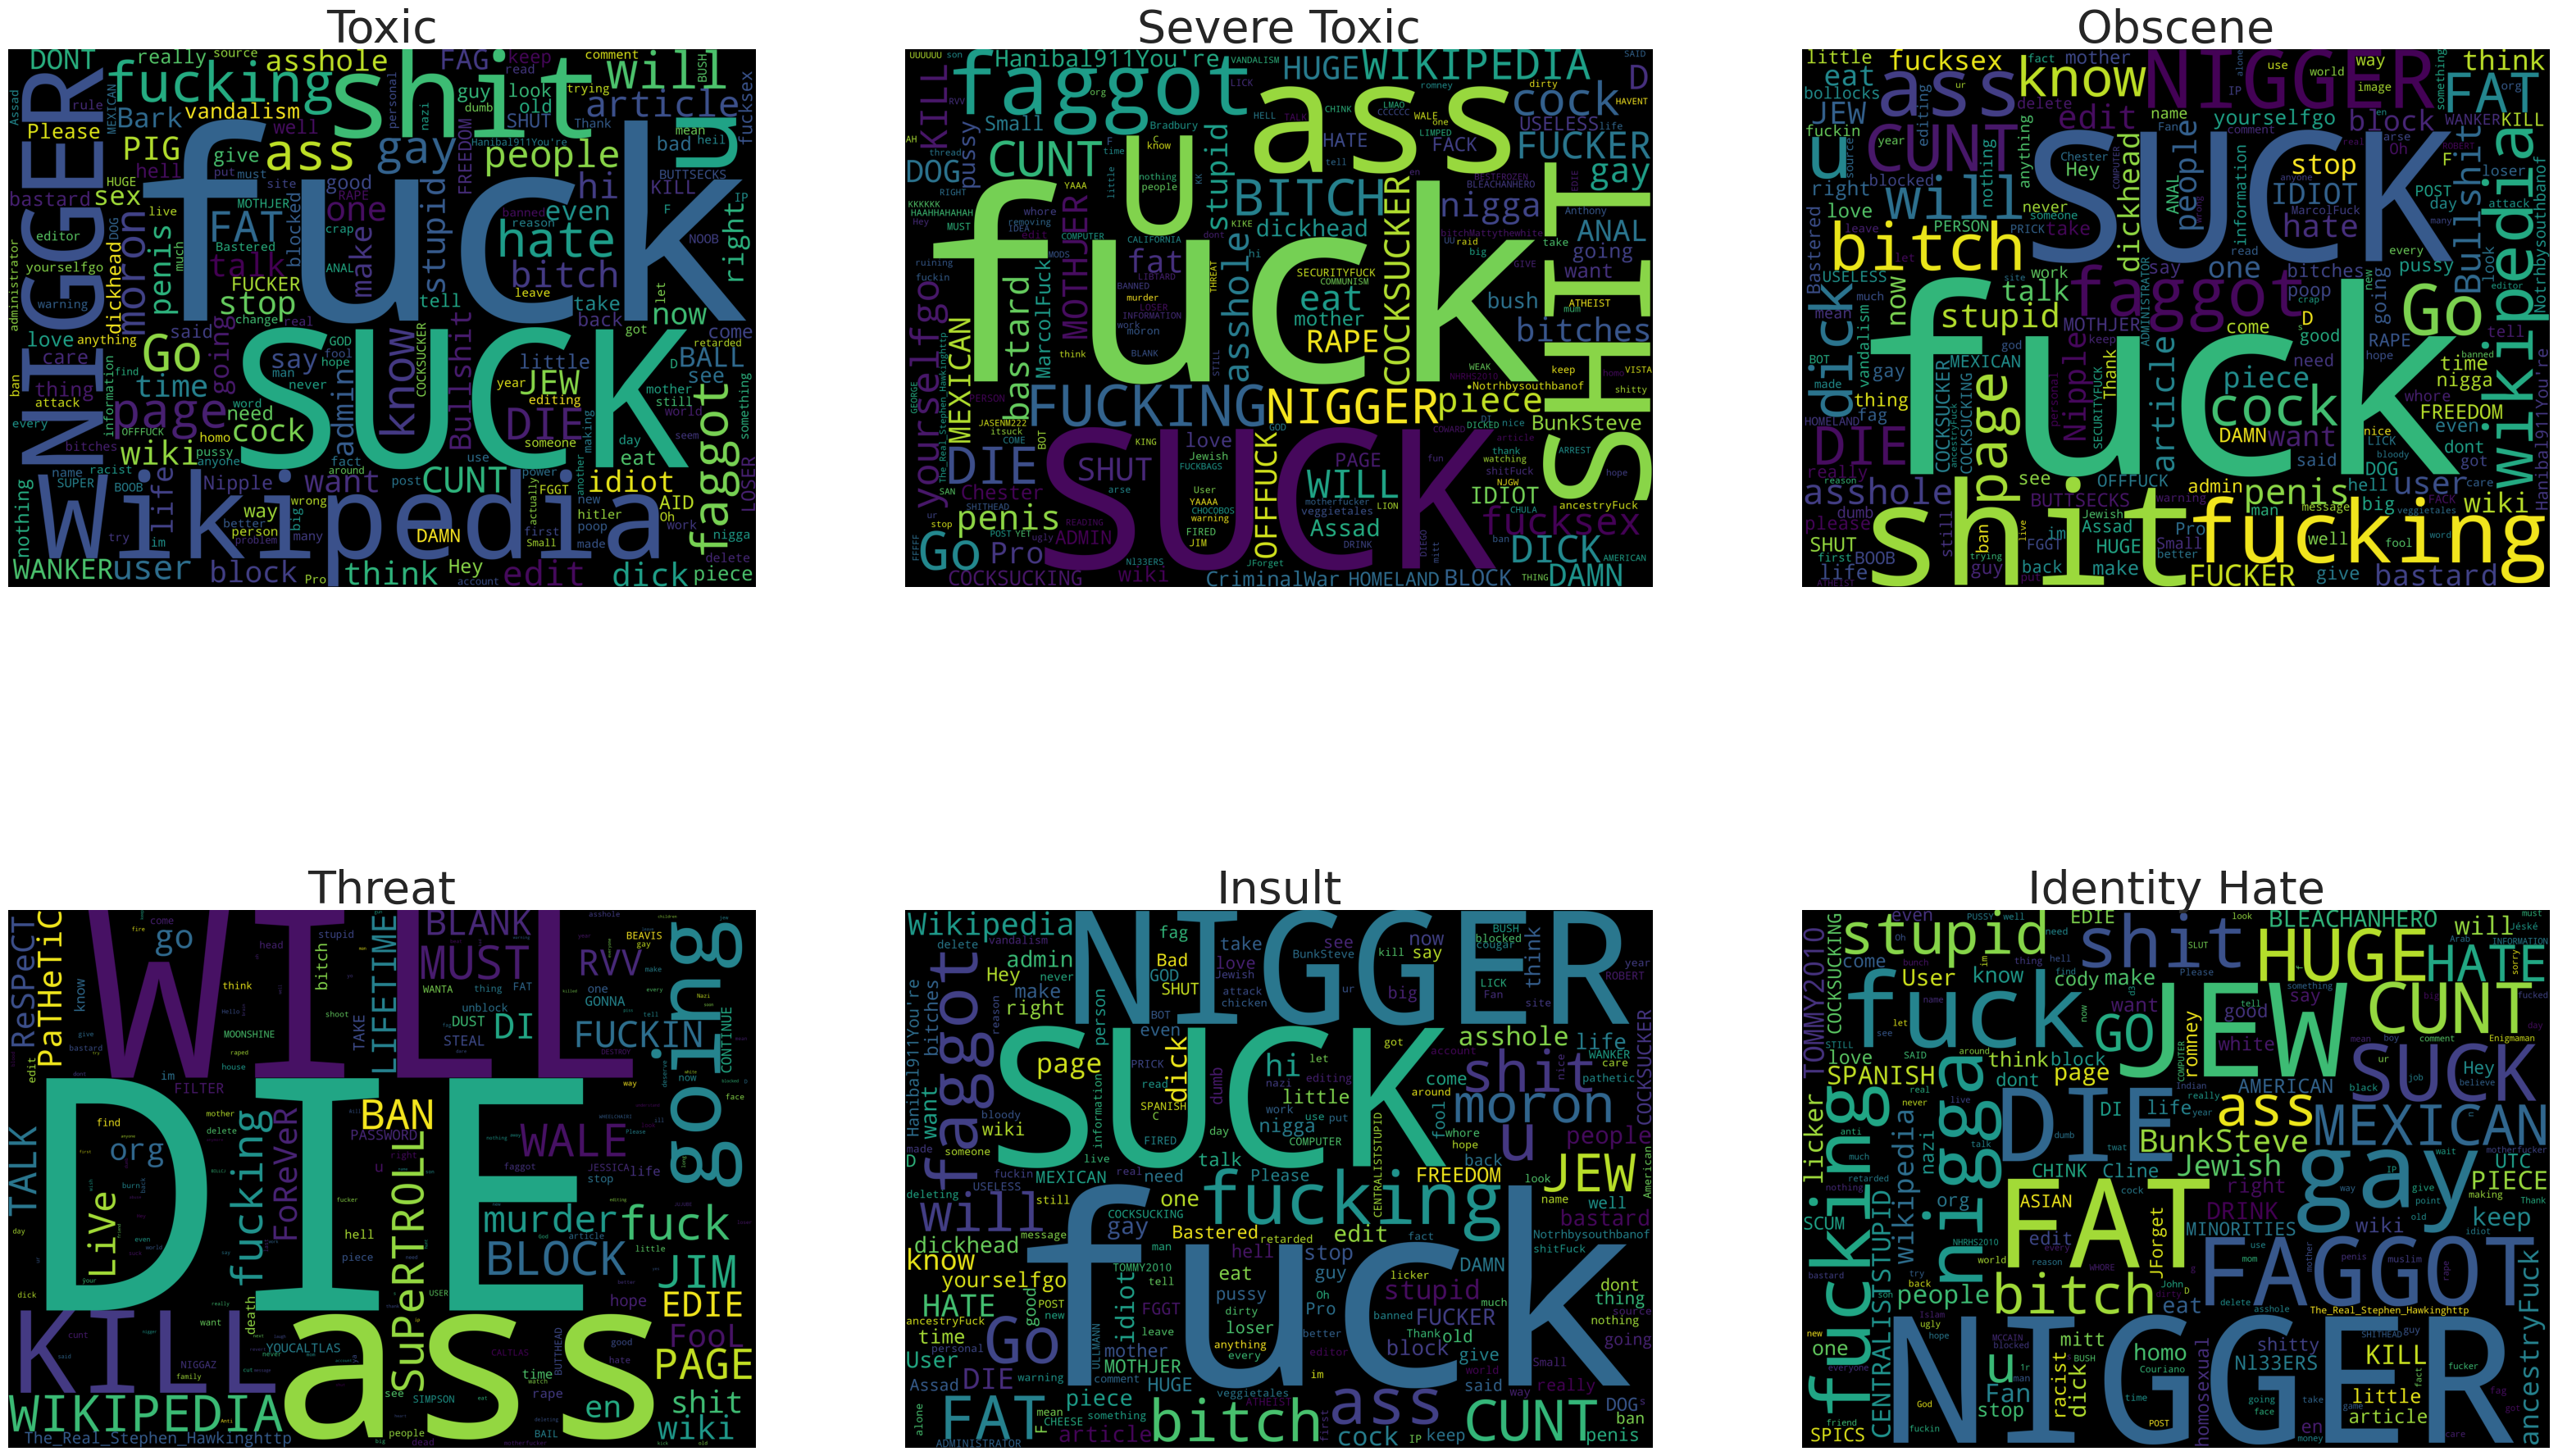

In [41]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# toxic
subset = train_df[train_df.toxic==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)


# severe_toxic
subset = train_df[train_df.severe_toxic==1]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)


# obscene
subset = train_df[train_df.obscene==1]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)


# threat
subset = train_df[train_df.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# insult
subset = train_df[train_df.insult==1]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)


# identity_hate
subset = train_df[train_df.identity_hate==1]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()

### Data preprocessing

In [43]:
data = train_df
data = train_df.loc[np.random.choice(train_df.index, size=2000)]
data.shape

(2000, 8)

In [48]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to /home/karen/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [45]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [46]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
70980,bdf9deadf7360061,i would like to believe a block log represents a true and fair record of reasons and sanctions if no one gives a toss about that sort of thing the...,0,0,0,0,0,0
158473,ee8275f3ffc2f493,there isnt a reason someone claimed some false authority by adding a hidden note into the article this is not acceptable,0,0,0,0,0,0
112641,5a9d73f41fd4e086,there seems to exist a branch of this family in finland nowadays,0,0,0,0,0,0
60826,a2d86d677ba9fff8,redirect talk real chance of love season,0,0,0,0,0,0
77682,d0146ce1e8c02364,just to add i had a quick look at your user page and i can see youre a very busy individual i am sorry that ive encroached on your time like this ...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
93398,f9b4f2e290700cb2,i was not actually banned in the first place the whole thing is bogus and dishonestly contrived by caspian blue which is why i will ignore it i on...,0,0,0,0,0,0
23494,3e07253a10d4563f,this person was in primar,0,0,0,0,0,0
30681,517f5f9deeb5755d,wikipedia sockpuppet investigations instantnood oldid prev diff that i really am instantnood i hope admins do things here a bit more equitably th...,0,0,0,0,0,0
10209,1b05a8e113722a05,de nada the anne thats quite a story it really needed a little love to give it lustre,0,0,0,0,0,0


In [49]:
# remove stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
70980,bdf9deadf7360061,would like believe block log represents true fair record reasons sanctions gives toss sort thing dont either,0,0,0,0,0,0
158473,ee8275f3ffc2f493,isnt reason someone claimed false authority adding hidden note article acceptable,0,0,0,0,0,0
112641,5a9d73f41fd4e086,seems exist branch family finland nowadays,0,0,0,0,0,0
60826,a2d86d677ba9fff8,redirect talk real chance love season,0,0,0,0,0,0
77682,d0146ce1e8c02364,add quick look user page see youre busy individual sorry ive encroached time like bear mind future think admirable spar...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
93398,f9b4f2e290700cb2,actually banned first place whole thing bogus dishonestly contrived caspian blue ignore used name document expose caspian blue...,0,0,0,0,0,0
23494,3e07253a10d4563f,person primar,0,0,0,0,0,0
30681,517f5f9deeb5755d,wikipedia sockpuppet investigations instantnood oldid prev diff really instantnood hope admins things bit equitably thank disruptive e...,0,0,0,0,0,0
10209,1b05a8e113722a05,de nada anne thats quite story really needed little love give lustre,0,0,0,0,0,0


In [50]:
# stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
70980,bdf9deadf7360061,would like believ block log repres true fair record reason sanction give toss sort thing dont either,0,0,0,0,0,0
158473,ee8275f3ffc2f493,isnt reason someon claim fals author ad hidden note articl accept,0,0,0,0,0,0
112641,5a9d73f41fd4e086,seem exist branch famili finland nowaday,0,0,0,0,0,0
60826,a2d86d677ba9fff8,redirect talk real chanc love season,0,0,0,0,0,0
77682,d0146ce1e8c02364,add quick look user page see your busi individu sorri ive encroach time like bear mind futur think admir spare time wikipedia,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
93398,f9b4f2e290700cb2,actual ban first place whole thing bogus dishonest contriv caspian blue ignor use name document expos caspian blue abus wikipedia system tag team ...,0,0,0,0,0,0
23494,3e07253a10d4563f,person primar,0,0,0,0,0,0
30681,517f5f9deeb5755d,wikipedia sockpuppet investig instantnood oldid prev diff realli instantnood hope admin thing bit equit thank disrupt edit disrupt edit https en w...,0,0,0,0,0,0
10209,1b05a8e113722a05,de nada ann that quit stori realli need littl love give lustr,0,0,0,0,0,0


In [52]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)

In [53]:
train_text = train['comment_text']
test_text = test['comment_text']

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')

tfidf_vectorizer.fit(train_text)
tfidf_vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [56]:
x_train = tfidf_vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = tfidf_vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

### OnevsRest Classifier

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [59]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing toxic comments...**
Test accuracy is 0.8783333333333333


**Processing severe_toxic comments...**
Test accuracy is 0.9816666666666667


**Processing obscene comments...**
Test accuracy is 0.9216666666666666


**Processing threat comments...**
Test accuracy is 0.9983333333333333


**Processing insult comments...**
Test accuracy is 0.9166666666666666


**Processing identity_hate comments...**
Test accuracy is 0.9816666666666667


CPU times: user 58.3 ms, sys: 104 ms, total: 163 ms
Wall time: 2.97 s


### OneVsOne / Binary Relevance

In [61]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.835


CPU times: user 5.44 s, sys: 5.08 s, total: 10.5 s
Wall time: 12.2 s


### Classifier Chains

In [62]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [63]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8666666666666667


CPU times: user 40.7 s, sys: 9.85 s, total: 50.6 s
Wall time: 19.8 s
